# CAR PRICE PREDICTION

### Problem Statement:
    With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
    cars are in demand hence making them costly and some are not in demand hence cheaper. One 
    of our clients works with small traders, who sell used cars. With the change in market due to covid 
    19 impact, our client is facing problems with their previous car price valuation machine learning 
    models. So, they are looking for new machine learning models from new data. We have to make 
    car price valuation model.This project contains two phase.
    
    1.Data Collection Phase:
    
    You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
    more the data better the model
    In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
    etc.) You need web scraping for this. You have to fetch data for different locations. The number of
    columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
    Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
    at last target variable Price of the car. This data is to give you a hint about important variables in 
    used car model. You can make changes to it, you can add or you can remove some columns, it 
    completely depends on the website from which you are fetching the data.
    Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
    Hatchback.
    
    Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
    
    2.Model Building Phase:
    
    After collecting the data, you need to build a machine learning model. Before model building do all 
    data pre-processing steps. Try different models with different hyper parameters and select the best 
    model.
    Follow the complete life cycle of data science. Include all the steps like.
        1. Data Cleaning
        2. Exploratory Data Analysis
        3. Data Pre-processing
        4. Model Building
        5. Model Evaluation
        6. Selecting the best model.

## Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows',None)

In [10]:
# loading the Dataset
df = pd.read_csv("Used_cars.csv")
df.head()

,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,location
0,['Eeco'],['Maruti'],5 Seater AC BSIV,2016,45347,Petrol,Manual,3.81,Ahmedabad
1,['Eeco'],['Maruti'],5 Seater AC,2020,19627,Petrol,Manual,4.70,Ahmedabad
2,['Eeco'],['Maruti'],5 Seater AC,2012,57341,Petrol,Manual,2.79,Ahmedabad
3,['Eeco'],['Maruti'],5 Seater AC,2020,17116,Petrol,Manual,4.72,Ahmedabad
4,['Eeco'],['Maruti'],5 Seater AC BSIV,2019,14161,Petrol,Manual,4.57,Ahmedabad


In [4]:
df.columns    # checking the variables in column section.

Index(['Model', 'Brand', 'Variant', 'Manufacturing_year', 'Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'location'], dtype='object')

### Dataframe Description:
    1. Model : A car's make is the brand of the vehicle, while the model refers to the name of a car product and sometimes                    a range of products.
    2. Brand : A type of product manufactured by a particular company under a particular name.
    3. Variant : Manufacturer, at his option may designate a version as a variant.
    4. Manufacturing year :  The Production market classifies years to specific vehicles, and model codes in place of the                                     model year.
    5. Diven Km  : The car is driven for particular distance.
    6. Fuel Type : Types of fuel is used for particular car.
    7. Transmission : the mechanism by which power is transmitted from an engine to the axle in a motor vehicle.
    8. Selling price : The car is quoted for particular price to sell it.
    9. Location : A particular place or position where car is sold.

#### In the above dataset the target is to predict the selling price.

In [5]:
df.info()  #Checking the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18865 entries, 0 to 18864
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               18865 non-null  object 
 1   Brand               18865 non-null  object 
 2   Variant             18865 non-null  object 
 3   Manufacturing_year  18865 non-null  int64  
 4   Driven_km           18865 non-null  int64  
 5   Fuel_type           18865 non-null  object 
 6   Transmission        18865 non-null  object 
 7   Selling_Price       18865 non-null  float64
 8   location            18865 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ MB


In [6]:
df.shape #checking the data dimension

(18865, 9)

We have 18865 rows and 9 columns including the target column.

## Exploratory Data Analysis

## Preprocessing

### Unique Function for dataset:

In [7]:
df.head()

,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,location
0,['Eeco'],['Maruti'],5 Seater AC BSIV,2016,45347,Petrol,Manual,3.81,Ahmedabad
1,['Eeco'],['Maruti'],5 Seater AC,2020,19627,Petrol,Manual,4.70,Ahmedabad
2,['Eeco'],['Maruti'],5 Seater AC,2012,57341,Petrol,Manual,2.79,Ahmedabad
3,['Eeco'],['Maruti'],5 Seater AC,2020,17116,Petrol,Manual,4.72,Ahmedabad
4,['Eeco'],['Maruti'],5 Seater AC BSIV,2019,14161,Petrol,Manual,4.57,Ahmedabad


In [9]:
# Brand feature is replacing using replace function
df["Brand"].replace(["['Maruti']", "['Ford']", "['Mahindra']", "['Audi']", "['Toyota']",
       "['Volkswagen']", "['Honda']", "['Nissan']", "['Hyundai']",
       "['Mercedes-Benz']", "['Kia']", "['Datsun']", "['Tata']",
       "['Renault']", "['Skoda']", "['BMW']", "['Jaguar']",
       "['Chevrolet']", "['MG']", "['Volvo']", "['Jeep']", "['Land']",
       "['Force']", "['Mini']", "['Fiat']", "['Mitsubishi']",
       "['Porsche']", "['Lexus']", "['Ambassador']", "['Isuzu']",
       "['Aston']", "['Bentley']", "['Premier']", "['OpelCorsa']",
       "['Maserati']"],

                    ['Maruti', 'Ford', 'Mahindra', 'Audi', 'Toyota',
       'Volkswagen', 'Honda', 'Nissan', 'Hyundai',
       'Mercedes-Benz', 'Kia', 'Datsun', 'Tata',
       'Renault', 'Skoda', 'BMW', 'Jaguar',
       'Chevrolet', 'MG', 'Volvo', 'Jeep', 'Land',
       'Force', 'Mini', 'Fiat', 'Mitsubishi',
       'Porsche', 'Lexus', 'Ambassador', 'Isuzu',
       'Aston', 'Bentley', 'Premier', 'OpelCorsa',
       'Maserati'],inplace=True)

In [10]:
# Now, lets see we replaced Brand into unique function for further process.
df["Brand"].unique()

array(['Maruti', 'Ford', 'Mahindra', 'Audi', 'Toyota', 'Volkswagen',
       'Honda', 'Nissan', 'Hyundai', 'Mercedes-Benz', 'Kia', 'Datsun',
       'Tata', 'Renault', 'Skoda', 'BMW', 'Jaguar', 'Chevrolet', 'MG',
       'Volvo', 'Jeep', 'Land', 'Force', 'Mini', 'Fiat', 'Mitsubishi',
       'Porsche', 'Lexus', 'Ambassador', 'Isuzu', 'Aston', 'Bentley',
       'Premier', 'OpelCorsa', 'Maserati'], dtype=object)

In [11]:
df.head()

,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,location
0,['Eeco'],Maruti,5 Seater AC BSIV,2016,45347,Petrol,Manual,3.81,Ahmedabad
1,['Eeco'],Maruti,5 Seater AC,2020,19627,Petrol,Manual,4.70,Ahmedabad
2,['Eeco'],Maruti,5 Seater AC,2012,57341,Petrol,Manual,2.79,Ahmedabad
3,['Eeco'],Maruti,5 Seater AC,2020,17116,Petrol,Manual,4.72,Ahmedabad
4,['Eeco'],Maruti,5 Seater AC BSIV,2019,14161,Petrol,Manual,4.57,Ahmedabad


In [12]:
#Check the null values in dataset
df.isnull().sum()

Model                 0
Brand                 0
Variant               0
Manufacturing_year    0
Driven_km             0
Fuel_type             0
Transmission          0
Selling_Price         0
location              0
dtype: int64

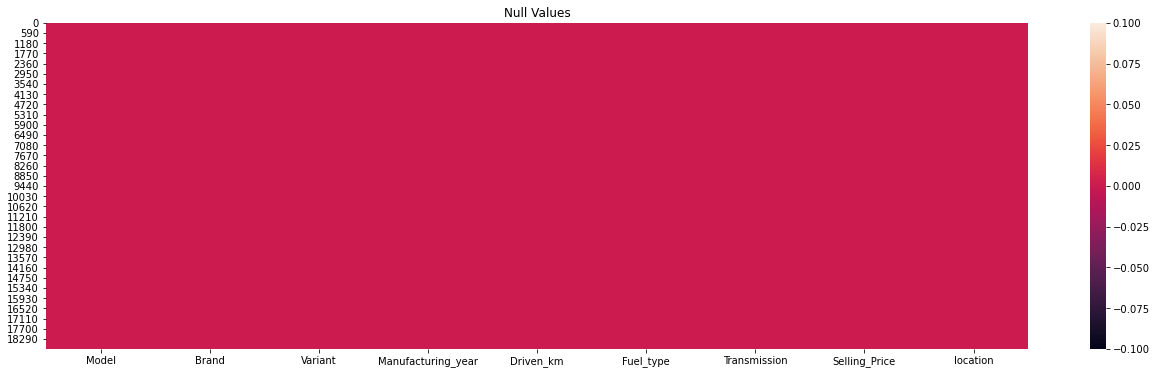

In [13]:
# Heatmap for Null value for data.
plt.figure(figsize=[22,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null value in the dataset.

Since, we can see lot of string values in the dataset,.then, proceed with encoding techniques to convert the string data to numerical one.

In [14]:
df.dtypes

Model                  object
Brand                  object
Variant                object
Manufacturing_year      int64
Driven_km               int64
Fuel_type              object
Transmission           object
Selling_Price         float64
location               object
dtype: object

In [15]:
df.head()

,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,location
0,['Eeco'],Maruti,5 Seater AC BSIV,2016,45347,Petrol,Manual,3.81,Ahmedabad
1,['Eeco'],Maruti,5 Seater AC,2020,19627,Petrol,Manual,4.70,Ahmedabad
2,['Eeco'],Maruti,5 Seater AC,2012,57341,Petrol,Manual,2.79,Ahmedabad
3,['Eeco'],Maruti,5 Seater AC,2020,17116,Petrol,Manual,4.72,Ahmedabad
4,['Eeco'],Maruti,5 Seater AC BSIV,2019,14161,Petrol,Manual,4.57,Ahmedabad


#### Now we are going to add features in dataset to which is required to check the car price according to current year (2021) i.e., Current year.

In [16]:
df["Current Year"] = 2021
df.head()

,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,location,Current Year
0,['Eeco'],Maruti,5 Seater AC BSIV,2016,45347,Petrol,Manual,3.81,Ahmedabad,2021
1,['Eeco'],Maruti,5 Seater AC,2020,19627,Petrol,Manual,4.70,Ahmedabad,2021
2,['Eeco'],Maruti,5 Seater AC,2012,57341,Petrol,Manual,2.79,Ahmedabad,2021
3,['Eeco'],Maruti,5 Seater AC,2020,17116,Petrol,Manual,4.72,Ahmedabad,2021
4,['Eeco'],Maruti,5 Seater AC BSIV,2019,14161,Petrol,Manual,4.57,Ahmedabad,2021


#### Then we move to see no of years. The car has been used by seller by adding a feature i.e., no_of_year.

#### The process carried to create a no of year is by subtracting current year and manufacturing year.

In [17]:
df["no_of_year"] = df["Current Year"] - df["Manufacturing_year"]
df.head()

,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,location,Current Year,no_of_year
0,['Eeco'],Maruti,5 Seater AC BSIV,2016,45347,Petrol,Manual,3.81,Ahmedabad,2021,5
1,['Eeco'],Maruti,5 Seater AC,2020,19627,Petrol,Manual,4.70,Ahmedabad,2021,1
2,['Eeco'],Maruti,5 Seater AC,2012,57341,Petrol,Manual,2.79,Ahmedabad,2021,9
3,['Eeco'],Maruti,5 Seater AC,2020,17116,Petrol,Manual,4.72,Ahmedabad,2021,1
4,['Eeco'],Maruti,5 Seater AC BSIV,2019,14161,Petrol,Manual,4.57,Ahmedabad,2021,2


#### Now, Let’s see the no of years is created. so, we dropped both manufacturing year and current year from data frame.

In [18]:
df.drop(["Manufacturing_year","Current Year"],axis = 1, inplace = True)
df.head()

,Model,Brand,Variant,Driven_km,Fuel_type,Transmission,Selling_Price,location,no_of_year
0,['Eeco'],Maruti,5 Seater AC BSIV,45347,Petrol,Manual,3.81,Ahmedabad,5
1,['Eeco'],Maruti,5 Seater AC,19627,Petrol,Manual,4.70,Ahmedabad,1
2,['Eeco'],Maruti,5 Seater AC,57341,Petrol,Manual,2.79,Ahmedabad,9
3,['Eeco'],Maruti,5 Seater AC,17116,Petrol,Manual,4.72,Ahmedabad,1
4,['Eeco'],Maruti,5 Seater AC BSIV,14161,Petrol,Manual,4.57,Ahmedabad,2


## Encoding of DataFrame:

### 1.	One hot encoding technique with multiple variables.

In [19]:
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
# checking features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['Model', 'Brand', 'Variant', 'Fuel_type', 'Transmission', 'location'], dtype='object')

In [21]:
# creating new df
new_df = df[['Brand','Driven_km','Fuel_type','Transmission', 'Selling_Price','location',"no_of_year"]]
new_df.head()

,Brand,Driven_km,Fuel_type,Transmission,Selling_Price,location,no_of_year
0,Maruti,45347,Petrol,Manual,3.81,Ahmedabad,5
1,Maruti,19627,Petrol,Manual,4.70,Ahmedabad,1
2,Maruti,57341,Petrol,Manual,2.79,Ahmedabad,9
3,Maruti,17116,Petrol,Manual,4.72,Ahmedabad,1
4,Maruti,14161,Petrol,Manual,4.57,Ahmedabad,2


In [22]:
# unique values in each columns
for x in new_df.columns:
    #printing unique values
    print(x ,':', len(new_df[x].unique()))

Brand : 35
Driven_km : 4399
Fuel_type : 5
Transmission : 2
Selling_Price : 1263
location : 12
no_of_year : 25


In [23]:
# finding the top 20 categories
new_df.Brand.value_counts().sort_values(ascending=False).head(20)

Maruti           5299
Hyundai          3654
Honda            1751
Toyota           1168
Mahindra          892
Ford              849
Volkswagen        698
Mercedes-Benz     695
BMW               627
Renault           592
Audi              550
Tata              435
Skoda             364
Chevrolet         239
Nissan            220
Land              132
Kia               106
Jaguar             85
Jeep               83
Volvo              80
Name: Brand, dtype: int64

In [24]:
# make list with top 10 variables
top_10 = [x for x in new_df.Brand.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Maruti',
 'Hyundai',
 'Honda',
 'Toyota',
 'Mahindra',
 'Ford',
 'Volkswagen',
 'Mercedes-Benz',
 'BMW',
 'Renault']

In [25]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
        df2[variable+'_'+label] = np.where(df[variable]==label,1,0)
# read the data again
df = df[['Brand','Driven_km','Fuel_type','Transmission', 'Selling_Price','location','no_of_year']]
#encode brand into the 10 most frequent categories
top_x(df,'Brand',top_10)
# display data
df.head()

,Brand,Driven_km,Fuel_type,Transmission,Selling_Price,location,no_of_year,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault
0,Maruti,45347,Petrol,Manual,3.81,Ahmedabad,5,1,0,0,0,0,0,0,0,0,0
1,Maruti,19627,Petrol,Manual,4.70,Ahmedabad,1,1,0,0,0,0,0,0,0,0,0
2,Maruti,57341,Petrol,Manual,2.79,Ahmedabad,9,1,0,0,0,0,0,0,0,0,0
3,Maruti,17116,Petrol,Manual,4.72,Ahmedabad,1,1,0,0,0,0,0,0,0,0,0
4,Maruti,14161,Petrol,Manual,4.57,Ahmedabad,2,1,0,0,0,0,0,0,0,0,0


In [26]:
df.columns

Index(['Brand', 'Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'location', 'no_of_year', 'Brand_Maruti', 'Brand_Hyundai', 'Brand_Honda', 'Brand_Toyota', 'Brand_Mahindra', 'Brand_Ford', 'Brand_Volkswagen', 'Brand_Mercedes-Benz', 'Brand_BMW', 'Brand_Renault'], dtype='object')

In [27]:
df = df[['Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'location', 'Brand_Maruti', 
         'Brand_Hyundai', 'Brand_Honda', 'Brand_Toyota', 'Brand_Mahindra', 'Brand_Ford', 
         'Brand_Volkswagen', 'Brand_Mercedes-Benz', 'Brand_BMW', 'Brand_Renault','no_of_year']]
df.head()

,Driven_km,Fuel_type,Transmission,Selling_Price,location,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year
0,45347,Petrol,Manual,3.81,Ahmedabad,1,0,0,0,0,0,0,0,0,0,5
1,19627,Petrol,Manual,4.70,Ahmedabad,1,0,0,0,0,0,0,0,0,0,1
2,57341,Petrol,Manual,2.79,Ahmedabad,1,0,0,0,0,0,0,0,0,0,9
3,17116,Petrol,Manual,4.72,Ahmedabad,1,0,0,0,0,0,0,0,0,0,1
4,14161,Petrol,Manual,4.57,Ahmedabad,1,0,0,0,0,0,0,0,0,0,2


### 2. One Hot Encoding for reamianing categorical features

In [28]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Driven_km,Selling_Price,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual,location_Bangalore,location_Chennai,location_Delhi NCR,location_Gurgaon,location_Hyderabad,location_Jaipur,location_Kolkata,location_Mumbai,location_New Delhi,location_Noida,location_Pune
0,45347,3.81,1,0,0,0,0,0,0,0,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,19627,4.70,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,57341,2.79,1,0,0,0,0,0,0,0,0,0,9,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,17116,4.72,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,14161,4.57,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


### Creating Excel sheet for further process.

In [29]:
car_price_prediction_after_one_hot_encoding = pd.DataFrame.from_dict(df)

# determining the name of the file
file_name = 'car_price_prediction_after_one_hot_encoding.xlsx'
  
# saving the excel
car_price_prediction_after_one_hot_encoding.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### Autoviz for Graphical representation

In [30]:
%%capture
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (18865, 30)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  26
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    30 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables


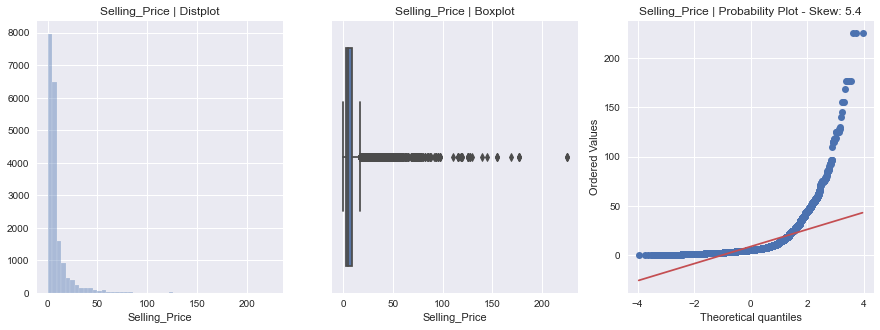

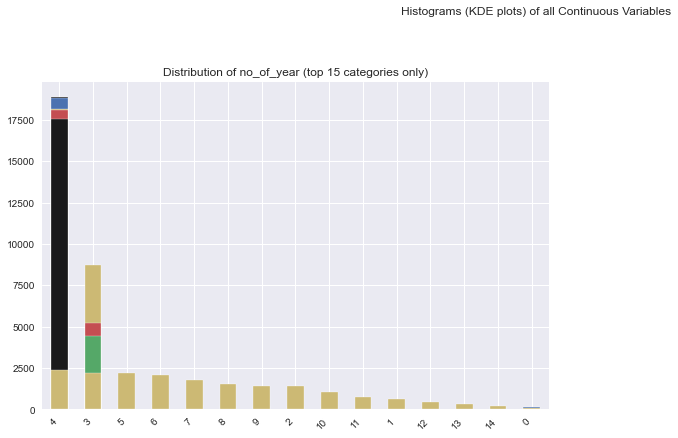

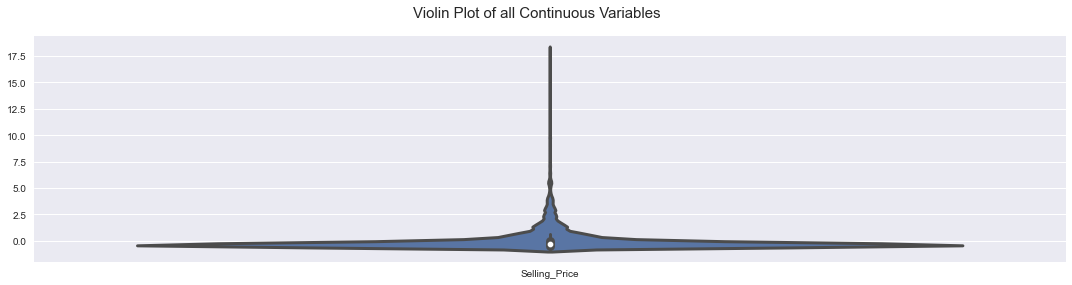

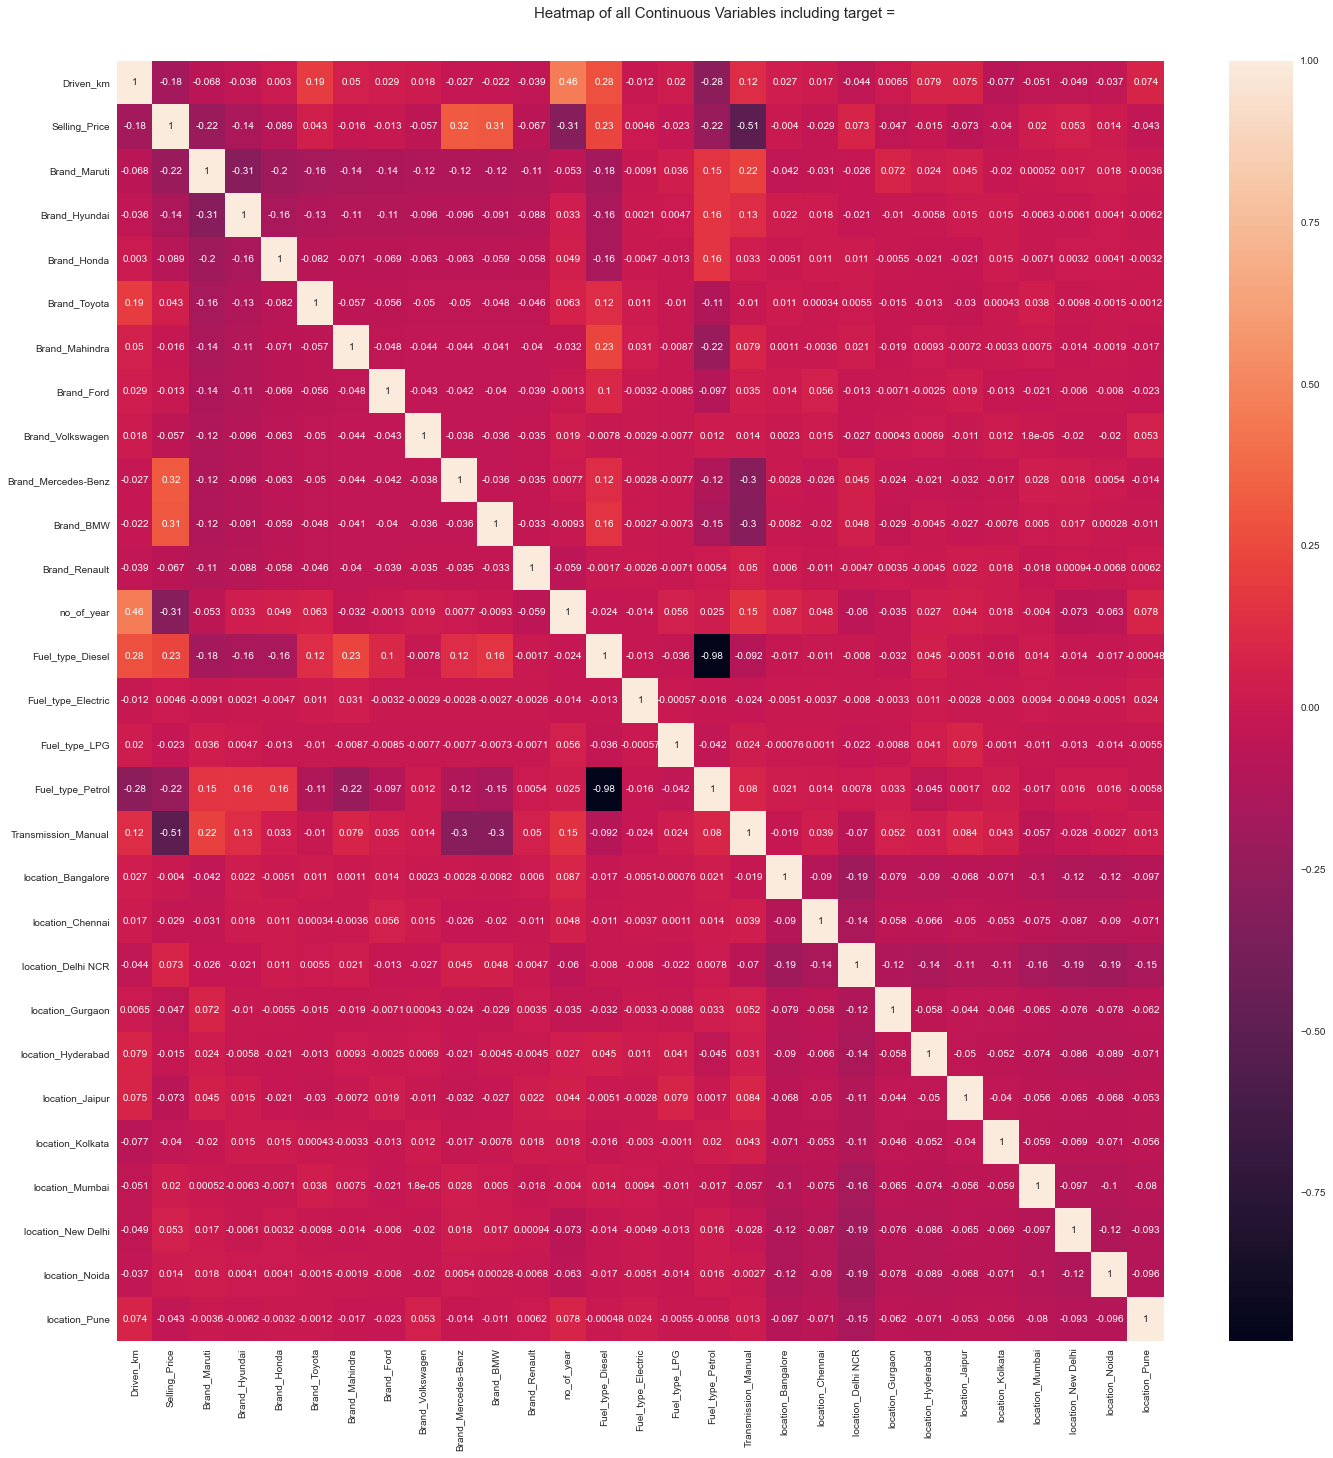

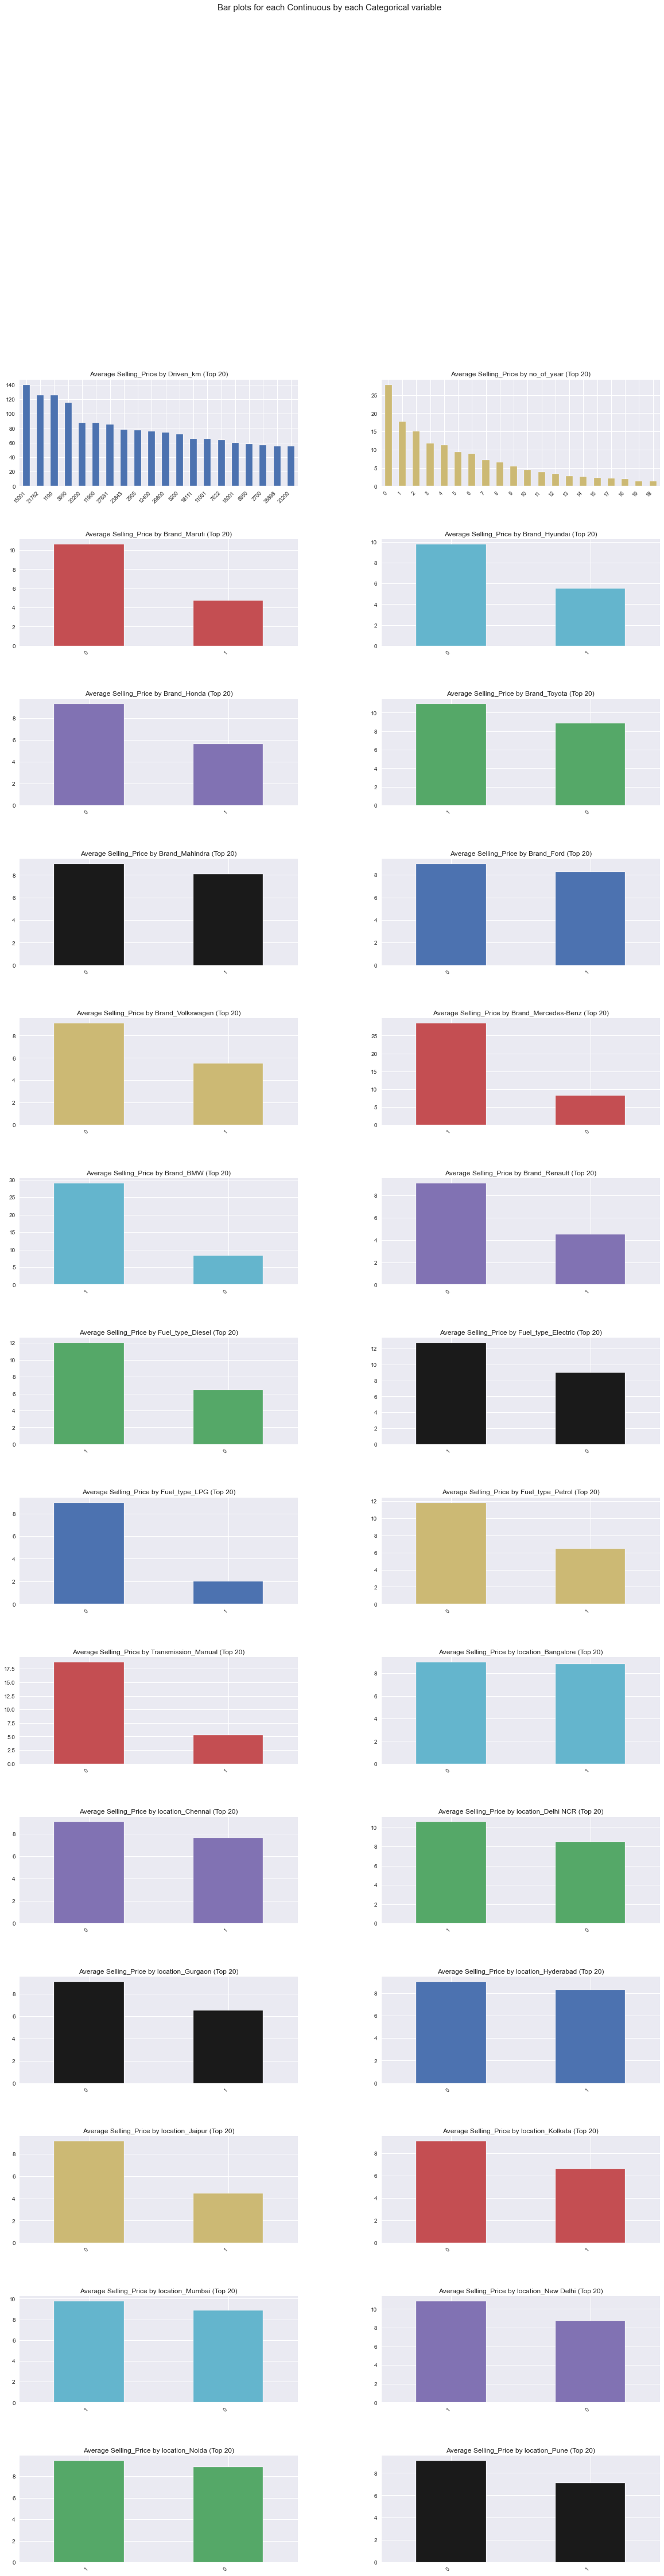

Time to run AutoViz (in seconds) = 14.426

 ###################### VISUALIZATION Completed ########################


In [31]:
df = AV.AutoViz("C:\\Users\\Jayasurya E\\Data_Science_Project\\car_price_prediction_project\\car_price_prediction_after_one_hot_encoding.xlsx")

In [32]:
df.head()

,Driven_km,Selling_Price,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual,location_Bangalore,location_Chennai,location_Delhi NCR,location_Gurgaon,location_Hyderabad,location_Jaipur,location_Kolkata,location_Mumbai,location_New Delhi,location_Noida,location_Pune
0,45347,3.81,1,0,0,0,0,0,0,0,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,19627,4.70,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,57341,2.79,1,0,0,0,0,0,0,0,0,0,9,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,17116,4.72,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,14161,4.57,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


## Describing Datasets:

In [32]:
# Stastistical summary
df_describe=df.describe()
df_describe

,Driven_km,Selling_Price,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual,location_Bangalore,location_Chennai,location_Delhi NCR,location_Gurgaon,location_Hyderabad,location_Jaipur,location_Kolkata,location_Mumbai,location_New Delhi,location_Noida,location_Pune
count,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000,18865.000000
mean,56623.499443,8.956964,0.280891,0.193692,0.092817,0.061914,0.047283,0.045004,0.037000,0.036841,0.033236,0.031381,6.198198,0.453909,0.000212,0.001537,0.535701,0.722608,0.109462,0.062179,0.234031,0.048237,0.061702,0.036311,0.039915,0.077339,0.101458,0.107978,0.070554
std,38608.147957,11.926699,0.449446,0.395201,0.290184,0.241005,0.212250,0.207318,0.188766,0.188376,0.179257,0.174349,3.319149,0.497884,0.014560,0.039179,0.498737,0.447723,0.312226,0.241486,0.423403,0.214273,0.240619,0.187067,0.195765,0.267136,0.301942,0.310361,0.256085
min,472.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32817.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54000.000000,5.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73000.000000,8.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,886253.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outcome of descibe of datasets:

from the above plotting we are determining mean, standard deviation, minimum and mazinum value of each column. it helps us further in data cleaning.

### Total Number of rows in the datasets:
    1.18865 rows
    2.29 columns

## Checking Correlation 

In [33]:
corr_mat=df.corr()
corr_mat

,Driven_km,Selling_Price,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual,location_Bangalore,location_Chennai,location_Delhi NCR,location_Gurgaon,location_Hyderabad,location_Jaipur,location_Kolkata,location_Mumbai,location_New Delhi,location_Noida,location_Pune
Driven_km,1.000000,-0.179689,-0.068184,-0.036379,0.002971,0.193974,0.049966,0.028520,0.017549,-0.027266,-0.022306,-0.039034,0.463704,0.275993,-0.011625,0.020316,-0.278593,0.121495,0.027292,0.017004,-0.044030,0.006467,0.079318,0.074503,-0.076850,-0.051215,-0.049493,-0.037447,0.073848
Selling_Price,-0.179689,1.000000,-0.221589,-0.140579,-0.088945,0.042553,-0.016334,-0.012836,-0.056896,0.318818,0.311755,-0.067144,-0.308634,0.233153,0.004589,-0.022985,-0.223833,-0.505879,-0.003963,-0.028935,0.073410,-0.046609,-0.014602,-0.073377,-0.039996,0.019571,0.053115,0.014484,-0.042884
Brand_Maruti,-0.068184,-0.221589,1.000000,-0.306321,-0.199912,-0.160562,-0.139233,-0.135674,-0.122506,-0.122232,-0.115882,-0.112493,-0.053099,-0.180579,-0.009102,0.035687,0.154978,0.217837,-0.041946,-0.030519,-0.026222,0.072324,0.023550,0.044508,-0.019587,0.000521,0.017334,0.018175,-0.003623
Brand_Hyundai,-0.036379,-0.140579,-0.306321,1.000000,-0.156774,-0.125915,-0.109189,-0.106397,-0.096071,-0.095856,-0.090876,-0.088219,0.033332,-0.157495,0.002075,0.004735,0.160713,0.126008,0.021922,0.017663,-0.020640,-0.010179,-0.005830,0.014571,0.015177,-0.006325,-0.006098,0.004084,-0.006183
Brand_Honda,0.002971,-0.088945,-0.199912,-0.156774,1.000000,-0.082175,-0.071259,-0.069437,-0.062698,-0.062558,-0.059308,-0.057574,0.048541,-0.157331,-0.004658,-0.012551,0.162627,0.032933,-0.005072,0.010686,0.010878,-0.005511,-0.020529,-0.021074,0.015032,-0.007126,0.003235,0.004080,-0.003239
Brand_Toyota,0.193974,0.042553,-0.160562,-0.125915,-0.082175,1.000000,-0.057233,-0.055769,-0.050357,-0.050244,-0.047634,-0.046241,0.063387,0.118767,0.011366,-0.010080,-0.113653,-0.010320,0.010672,0.000342,0.005533,-0.014722,-0.012860,-0.029879,0.000426,0.037603,-0.009836,-0.001501,-0.001209
Brand_Mahindra,0.049966,-0.016334,-0.139233,-0.109189,-0.071259,-0.057233,1.000000,-0.048361,-0.043667,-0.043570,-0.041306,-0.040098,-0.031814,0.227800,0.031063,-0.008741,-0.224272,0.078897,0.001088,-0.003582,0.021380,-0.018682,0.009303,-0.007195,-0.003323,0.007492,-0.013649,-0.001864,-0.016516
Brand_Ford,0.028520,-0.012836,-0.135674,-0.106397,-0.069437,-0.055769,-0.048361,1.000000,-0.042551,-0.042456,-0.040250,-0.039073,-0.001253,0.102011,-0.003161,-0.008518,-0.097314,0.034555,0.013977,0.056342,-0.013100,-0.007105,-0.002534,0.019372,-0.012915,-0.020733,-0.006044,-0.007969,-0.022866
Brand_Volkswagen,0.017549,-0.056896,-0.122506,-0.096071,-0.062698,-0.050357,-0.043667,-0.042551,1.000000,-0.038335,-0.036344,-0.035281,0.018670,-0.007800,-0.002855,-0.007691,0.011870,0.013561,0.002335,0.014652,-0.027429,0.000433,0.006924,-0.011026,0.011676,0.000018,-0.020292,-0.020240,0.053464
Brand_Mercedes-Benz,-0.027266,0.318818,-0.122232,-0.095856,-0.062558,-0.050244,-0.043570,-0.042456,-0.038335,1.000000,-0.036263,-0.035202,0.007737,0.122953,-0.002848,-0.007674,-0.118668,-0.303718,-0.002772,-0.025887,0.045427,-0.024329,-0.020914,-0.031946,-0.016878,0.027652,0.018162,0.005400,-0.014324


<AxesSubplot:title={'center':'Corrleation Matrix'}>

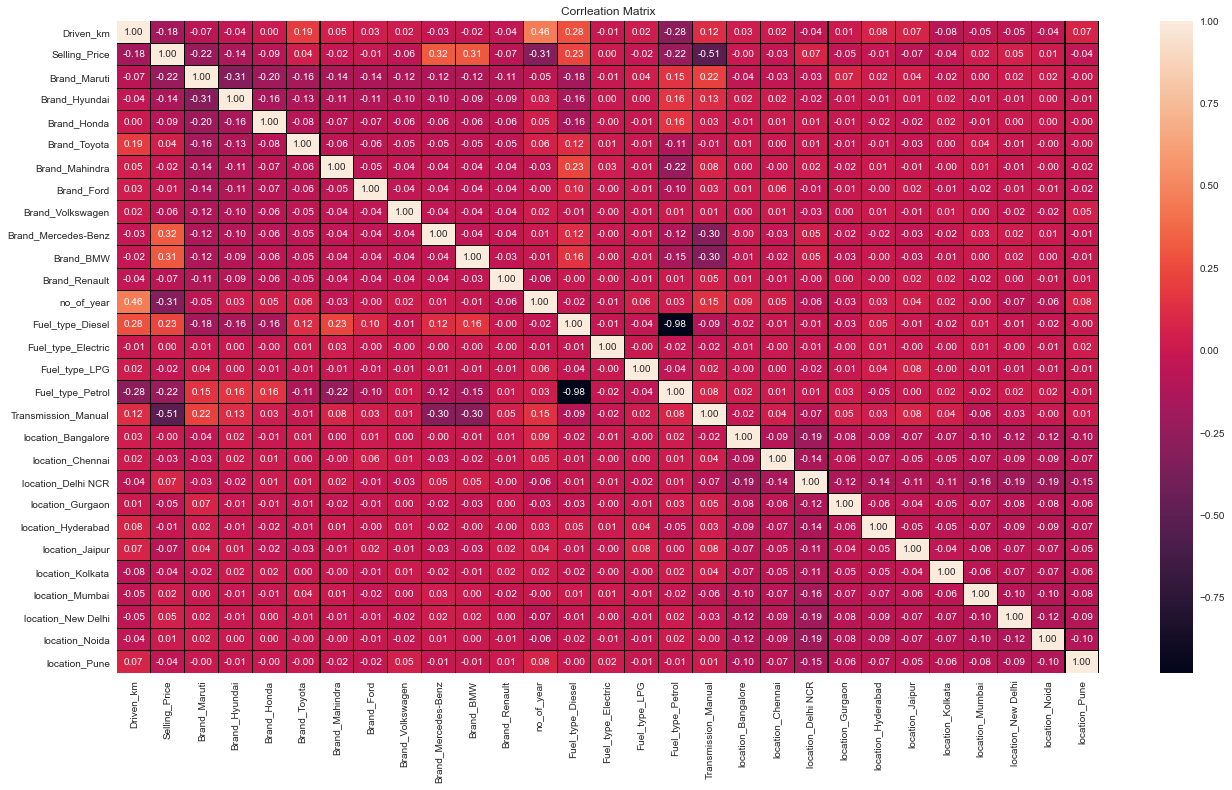

In [34]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(22,12))
plt.title("Corrleation Matrix")
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

#### Observations: We are unable to identify the correlation in above heatmap due to huge number of columns.

In [35]:
corr_matrix=df.corr()
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price          1.000000
Brand_Mercedes-Benz    0.318818
Brand_BMW              0.311755
Fuel_type_Diesel       0.233153
location_Delhi NCR     0.073410
location_New Delhi     0.053115
Brand_Toyota           0.042553
location_Mumbai        0.019571
location_Noida         0.014484
Fuel_type_Electric     0.004589
location_Bangalore    -0.003963
Brand_Ford            -0.012836
location_Hyderabad    -0.014602
Brand_Mahindra        -0.016334
Fuel_type_LPG         -0.022985
location_Chennai      -0.028935
location_Kolkata      -0.039996
location_Pune         -0.042884
location_Gurgaon      -0.046609
Brand_Volkswagen      -0.056896
Brand_Renault         -0.067144
location_Jaipur       -0.073377
Brand_Honda           -0.088945
Brand_Hyundai         -0.140579
Driven_km             -0.179689
Brand_Maruti          -0.221589
Fuel_type_Petrol      -0.223833
no_of_year            -0.308634
Transmission_Manual   -0.505879
Name: Selling_Price, dtype: float64

### Now we can clearly identify the correlation of independent variables with the target variables "Selling_Price".There are some variables who has less than 0.01 correlation value(very week relationship.)

### Checking the columns which are postively and negative correlated with the target columns:

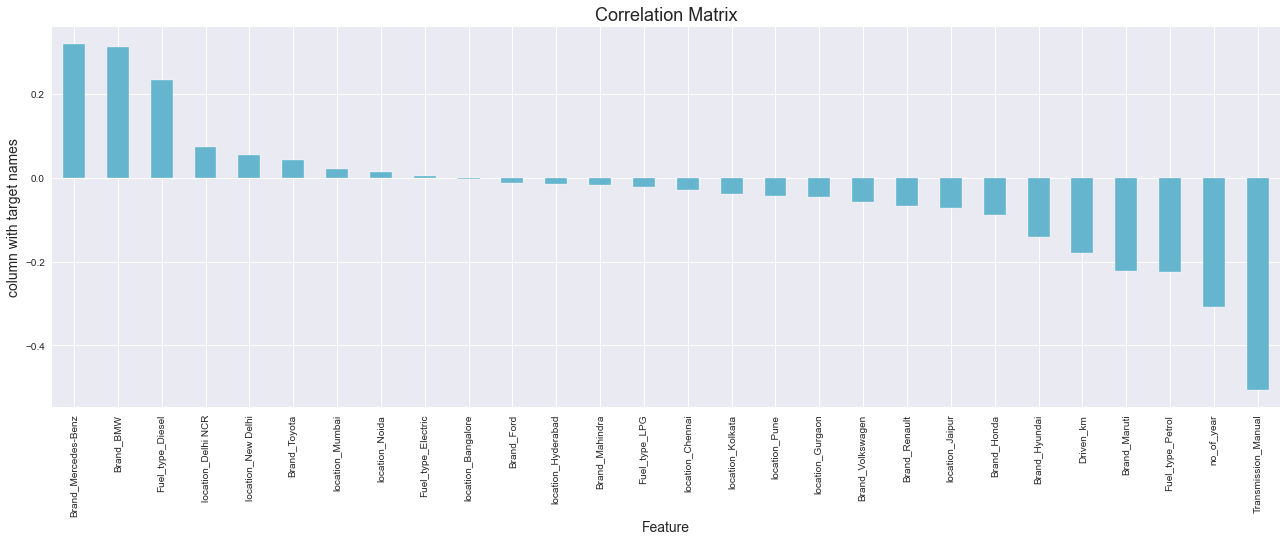

In [36]:
plt.figure(figsize=(22,7))
df.corr()['Selling_Price'].sort_values(ascending=False).drop(['Selling_Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)

plt.title('Correlation Matrix',fontsize=18)
plt.show()

### Outcome of Correlation:
    The Columns of the dataset is Correlated in both Positively and Negatively with target columns.
    The Positive and negative correlation values is shown in both numbers and graph.
    Max correlation:Brand_Mercedes-Benz
    Min correlation:Transmission_Manual

### Lets check the data distribution among all the columns.

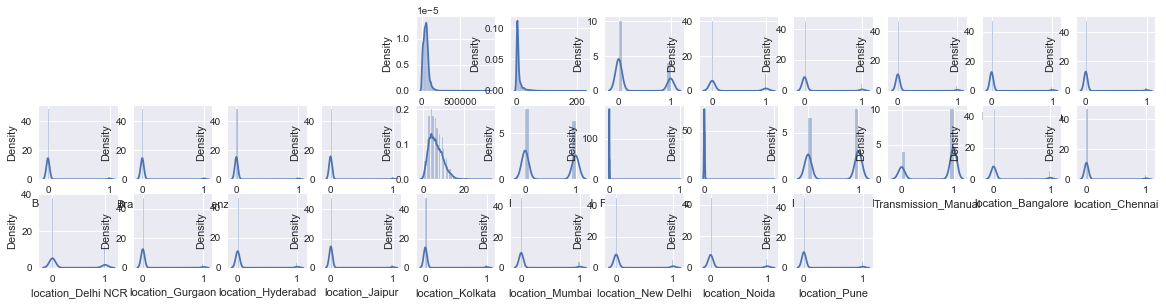

In [37]:
collist=df.columns.values
ncol=12
nrow=10
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+5)
    sns.distplot(df[collist[i]])

Now, we can see skewness in data for the multiple columns, will handle the skewness in further steps.

### Outliers Checking:

In this dataset, We applied one hot encoding method to categorical features. so we check outlies for nominal features i.e. Diven_Km, no_of_years and Selling Price. Only Driven_km and no_of_years is considered because Selling Price is our target Variable.

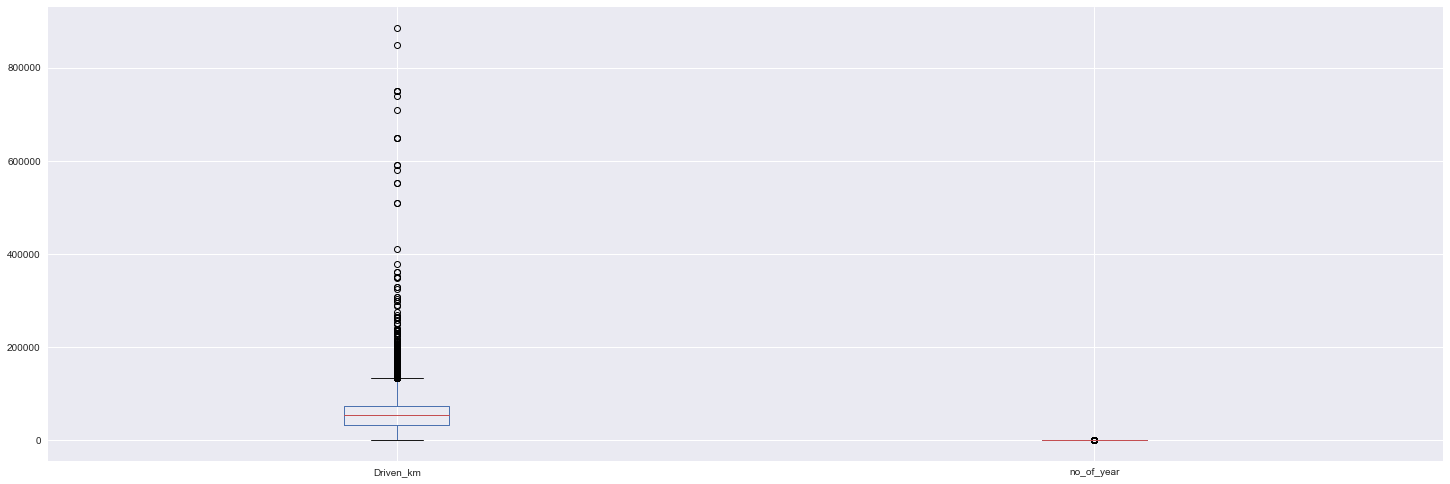

In [38]:
#Plotting Boxplots for  columns
df[["Driven_km","no_of_year"]].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### We can see outliers in Driven km due to various kilometers driven for different cars. so we proceed further steps:

### Skewness:

In [39]:
#Checking skewness
df.skew()

Driven_km               4.840692
Selling_Price           5.401628
Brand_Maruti            0.975123
Brand_Hyundai           1.550303
Brand_Honda             2.806672
Brand_Toyota            3.635883
Brand_Mahindra          4.266337
Brand_Ford              4.389812
Brand_Volkswagen        4.906065
Brand_Mercedes-Benz     4.917924
Brand_BMW               5.208302
Brand_Renault           5.376202
no_of_year              0.742327
Fuel_type_Diesel        0.185166
Fuel_type_Electric     68.658574
Fuel_type_LPG          25.448414
Fuel_type_Petrol       -0.143181
Transmission_Manual    -0.994505
location_Bangalore      2.501900
location_Chennai        3.626443
location_Delhi NCR      1.256471
location_Gurgaon        4.217141
location_Hyderabad      3.643476
location_Jaipur         4.957997
location_Kolkata        4.700873
location_Mumbai         3.164728
location_New Delhi      2.640141
location_Noida          2.526506
location_Pune           3.354289
dtype: float64

### Standard Scaler Technique:

In [40]:
from sklearn.preprocessing import StandardScaler

# 2 features are taken in consideration
features = df[["Driven_km","Selling_Price"]]

# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(features) 
scaled_data

array([[-0.29208338, -0.43156118],
       [-0.95828166, -0.3569367 ],
       [ 0.01858467, -0.51708585],
       ...,
       [-1.05222805, -0.2873431 ],
       [ 1.84879089, -0.20601081],
       [ 7.59902487, -0.43659204]])

In [41]:
df.head()

,Driven_km,Selling_Price,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual,location_Bangalore,location_Chennai,location_Delhi NCR,location_Gurgaon,location_Hyderabad,location_Jaipur,location_Kolkata,location_Mumbai,location_New Delhi,location_Noida,location_Pune
0,45347,3.81,1,0,0,0,0,0,0,0,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,19627,4.70,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,57341,2.79,1,0,0,0,0,0,0,0,0,0,9,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,17116,4.72,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,14161,4.57,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Splitting the indepedent and target variable in x and y
x= df.drop('Selling_Price',axis=1)
y= df['Selling_Price']

### To handle Skewness we proceed with power transform function

In [43]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [44]:
df_new.skew()

Driven_km               0.122132
Brand_Maruti            0.975123
Brand_Hyundai           1.550303
Brand_Honda             2.806672
Brand_Toyota            3.635883
Brand_Mahindra          4.266337
Brand_Ford              4.389812
Brand_Volkswagen        4.906065
Brand_Mercedes-Benz     4.917924
Brand_BMW               5.208302
Brand_Renault           5.376202
no_of_year             -0.017734
Fuel_type_Diesel        0.185166
Fuel_type_Electric     68.658574
Fuel_type_LPG          25.448414
Fuel_type_Petrol       -0.143181
Transmission_Manual    -0.994505
location_Bangalore      2.501900
location_Chennai        3.626443
location_Delhi NCR      1.256471
location_Gurgaon        4.217141
location_Hyderabad      3.643476
location_Jaipur         4.957997
location_Kolkata        4.700873
location_Mumbai         3.164728
location_New Delhi      2.640141
location_Noida          2.526506
location_Pune           3.354289
dtype: float64

### Skewness has been removed for nominal variable i.e.Driven_km amd no_of_years.,remaining all categorical variable.Now we can proceed with further steps.

In [45]:
x=df_new
x.head()

,Driven_km,Brand_Maruti,Brand_Hyundai,Brand_Honda,Brand_Toyota,Brand_Mahindra,Brand_Ford,Brand_Volkswagen,Brand_Mercedes-Benz,Brand_BMW,Brand_Renault,no_of_year,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual,location_Bangalore,location_Chennai,location_Delhi NCR,location_Gurgaon,location_Hyderabad,location_Jaipur,location_Kolkata,location_Mumbai,location_New Delhi,location_Noida,location_Pune
0,-0.146292,1.600033,-0.490123,-0.319865,-0.256904,-0.222778,-0.217082,-0.196014,-0.195576,-0.185415,-0.179993,-0.234316,-0.911701,-0.014563,-0.039238,0.930974,0.619577,-0.350595,-0.25749,-0.552753,-0.225127,-0.256435,-0.19411,-0.203899,-0.28952,-0.336026,-0.34792,-0.275517
1,-1.172117,1.600033,-0.490123,-0.319865,-0.256904,-0.222778,-0.217082,-0.196014,-0.195576,-0.185415,-0.179993,-2.014985,-0.911701,-0.014563,-0.039238,0.930974,0.619577,-0.350595,-0.25749,-0.552753,-0.225127,-0.256435,-0.19411,-0.203899,-0.28952,-0.336026,-0.34792,-0.275517
2,0.209580,1.600033,-0.490123,-0.319865,-0.256904,-0.222778,-0.217082,-0.196014,-0.195576,-0.185415,-0.179993,0.894167,-0.911701,-0.014563,-0.039238,0.930974,0.619577,-0.350595,-0.25749,-0.552753,-0.225127,-0.256435,-0.19411,-0.203899,-0.28952,-0.336026,-0.34792,-0.275517
3,-1.309031,1.600033,-0.490123,-0.319865,-0.256904,-0.222778,-0.217082,-0.196014,-0.195576,-0.185415,-0.179993,-2.014985,-0.911701,-0.014563,-0.039238,0.930974,0.619577,-0.350595,-0.25749,-0.552753,-0.225127,-0.256435,-0.19411,-0.203899,-0.28952,-0.336026,-0.34792,-0.275517
4,-1.486435,1.600033,-0.490123,-0.319865,-0.256904,-0.222778,-0.217082,-0.196014,-0.195576,-0.185415,-0.179993,-1.445159,-0.911701,-0.014563,-0.039238,0.930974,0.619577,-0.350595,-0.25749,-0.552753,-0.225127,-0.256435,-0.19411,-0.203899,-0.28952,-0.336026,-0.34792,-0.275517


## Importing  Libraries for Metrics and Model buiding.

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

## Regression Method

In [47]:
maxR2=0
BestRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2=r2_score(y_test, predrf)
    if r2>maxR2:
        maxR2=r2
        BestRS=i
print("Best R2 is " ,maxR2," on Random_state ",BestRS)

Best R2 is  0.5362843236245256  on Random_state  27


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state = BestRS)

In [49]:
def eval(x):
    mod =x
    mod.fit(x_train, y_train)
    predict_test = mod.predict(x_test)
    print("R2 score is ", r2_score(y_test, predict_test)*100)
    print("Mean Absolute error is", mean_absolute_error(y_test,predict_test))
    print("Mean squared error is", mean_squared_error(y_test,predict_test))
    print("Root mean squared error is", np.sqrt(mean_squared_error(y_test,predict_test)))

In [50]:
eval(LinearRegression())

R2 score is  53.62843236245256
Mean Absolute error is 4.206837559309475
Mean squared error is 56.70694783176462
Root mean squared error is 7.530401571746664


In [51]:
eval(KNeighborsRegressor())

R2 score is  65.71952192862209
Mean Absolute error is 2.674469652796183
Mean squared error is 41.92097400795124
Root mean squared error is 6.474640840073775


In [52]:
eval(RandomForestRegressor())

R2 score is  77.45755370756814
Mean Absolute error is 1.9697984118190608
Mean squared error is 27.566748139655918
Root mean squared error is 5.250404569140926


In [53]:
eval(DecisionTreeRegressor())

R2 score is  61.2557671121709
Mean Absolute error is 1.985353608976058
Mean squared error is 47.379618699215186
Root mean squared error is 6.883285458210722


In [54]:
eval(XGBRegressor())

R2 score is  72.0177661568862
Mean Absolute error is 2.353461586330318
Mean squared error is 34.21896553423522
Root mean squared error is 5.849697901108673


So, In our modelling approach, the best model is Random forest Regreesor and the worst model is Linear Regression. We can see that the difference in R2 score between the best model and the worst model is significant; the best model has almost 25 % of the R2 score of the worst model.but it can be due to overhitting also so we well check cross validation scores.

## Cross Validation:

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scr=cross_val_score(LinearRegression(), x, y, cv=5)
print("cross validation score of Linear Regression model:",scr.mean()*100)

cross validation score of Linear Regression model: -4.1609165076137726e+24


In [57]:
scr=cross_val_score(KNeighborsRegressor(), x, y, cv=5)
print("cross validation score of KNeighbors Regressor model:",scr.mean()*100)

cross validation score of KNeighbors Regressor model: 53.89002789564164


In [58]:
scr=cross_val_score(RandomForestRegressor(), x, y, cv=5)
print("cross validation score of Random Forest Regressor model:",scr.mean()*100)

cross validation score of Random Forest Regressor model: 69.19091614715529


In [59]:
scr=cross_val_score(DecisionTreeRegressor(), x, y, cv=5)
print("cross validation score of Decision Tree Regressor model:",scr.mean()*100)

cross validation score of Decision Tree Regressor model: 54.18068227979956


In [60]:
scr=cross_val_score(XGBRegressor(), x, y, cv=5)
print("cross validation score of XGBoost Regressor model:",scr.mean()*100)

cross validation score of XGBoost Regressor model: 65.62882017529134


### Min difference in R2 score and cross validation score is for XGBoost Regressor model,so this is our best model.

### Here we have handled the problem of the overfitting and the underfitting by checking the R2 score.

## Hyper Parameter Tuning

Import RandomizedSearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

### Hyper Parameter Tuning for Random Forest Regressor

In [62]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Verbose is a general programming term for produce lots of logging output.
verbosity = [3]
#minimum sum of instance weight (hessian) needed in a child   
min_child_weight  = [1, 2, 5, 10]
# The booster parameter sets the type of learner.
booster = ['gbtree', 'gblinear']

In [63]:
from xgboost import XGBRegressor
parameters={'n_estimators': n_estimators,
               'max_depth': max_depth,
               'verbosity': verbosity,
               'min_child_weight': min_child_weight,
               'booster': booster}
xgb=XGBRegressor()
clf=RandomizedSearchCV(xgb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

[21:28:24] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[21:28:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[21:28:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:28:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:28:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:28:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:28:24] INFO: C:/Us

In [64]:
xgb=XGBRegressor(n_estimators = 400, min_child_weight = 2, max_depth = 20, booster = 'gbtree',
                         verbosity = 3)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision=xgb.predict(x_test)
xgbs=r2_score(y_test,pred_decision)
print('R2 Score:',xgbs*100)

[21:33:40] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[21:33:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1088 extra nodes, 0 pruned nodes, max_depth=20
[21:33:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1678 extra nodes, 0 pruned nodes, max_depth=20
[21:33:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2864 extra nodes, 0 pruned nodes, max_depth=20
[21:33:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 3824 extra nodes, 0 pruned nodes, max_depth=20
[21:33:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 5082 extra nodes, 0 pruned nodes, max_depth=20
[21:33:

In [65]:
xgbscore=cross_val_score(xgb,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

[21:35:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1064 extra nodes, 0 pruned nodes, max_depth=20
[21:35:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1802 extra nodes, 0 pruned nodes, max_depth=20
[21:35:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2766 extra nodes, 0 pruned nodes, max_depth=20
[21:35:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 3630 extra nodes, 0 pruned nodes, max_depth=20
[21:35:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 4588 extra nodes, 0 pruned nodes, max_depth=20
[21:35:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 522

### We are getting model accuracy and cross validation has 78% & 70% respectively.which shows our model is performing well.

## Analysis and Comparision

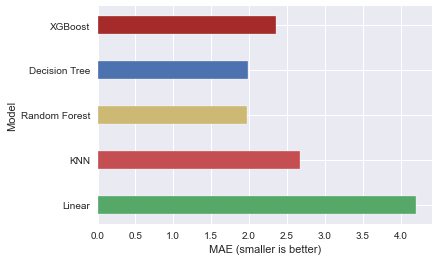

In [66]:
x = ['Linear','KNN','Random Forest', 'Decision Tree', 'XGBoost']
y = [4.21, 2.67 , 1.97, 1.99, 2.35]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest has the smallest MAE, 1.97 followed by 1.99 with a little larger error of 0.02. After that, XGBoost come with error of 2.35.At last, the K-Nearest Neighbors and linear comes with an similar errors: 2.67 and 4.21 respectively.

So, In our experiment, the best model is Random Forest and the worst model is Linear. We can see that the difference in MAE between the best model and the worst model is significant; the best model has least error of the worst model.

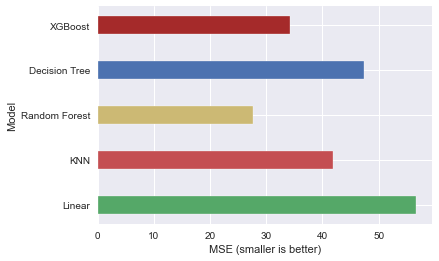

In [67]:
x = ['Linear','KNN','Random Forest', 'Decision Tree', 'XGBoost']
y = [56.71, 41.92, 27.57, 47.38, 34.22]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest has the smallest MSE, 27.57. After that, XGBoost and  K-Nearest Neighbors comes with similar errors: 34.22 and 41.92 respectively. At last, the Decision Tree and Linear comes with an similar errors: 47.38 and 56.71 respectively.

So, in our experiment, the best model is Random Forest and the worst model is Linear. We can see that the difference in MSE between the best model and the worst model is significant; the best model has least error of the worst model.

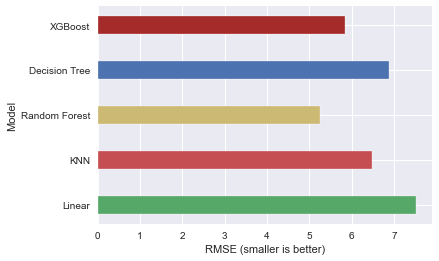

In [68]:
x = ['Linear','KNN','Random Forest', 'Decision Tree', 'XGBoost']
y = [7.53, 6.47, 5.25, 6.88, 5.85]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="RMSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest has the smallest RMSE of 5.25. After that, XGBoost and K-Nearest Neighbors comes with similar errors: 5.85 and 6.47 respectively. At last, the Decision Tree and linear comes with an similar errors: 6.88 and 7.53 respectively.

So, in our experiment, the best model is Random forest and the worst model is Linear. We can see that the difference in RMSE between the best model and the worst model is significant; the best model has almost least error of the worst model.

We know that our best model is Random Forest but when compared with cross validation score it has overfitting and crossfitting is high. After compared with R2 score, minimum difference is for XGBoost. so finally , i choosen this is our best model for choice then the worst model is Linear.

## Feature Importances

Now, let's see the most important features as for XGBoost Regressor:

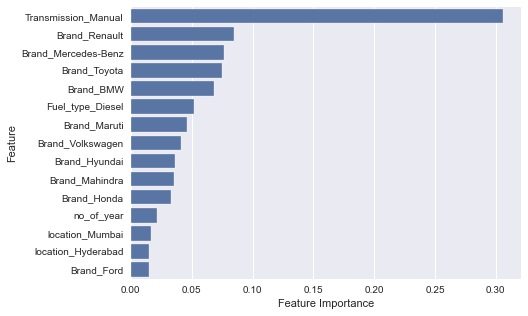

In [69]:
xgb_feature_importances = xgb.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, js = plt.subplots(figsize=(7,5))
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index, color="b");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

## Model Saving

In [70]:
import pickle
filename='Car_Price_Prediction_Project.pkl'
pickle.dump(xgb, open(filename, 'wb'))

## Conclusion

In [71]:
loaded_model = pickle.load(open('Car_Price_Prediction_Project.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

78.18185367083443


In [72]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170,3171,3172,3173,3174,3175,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204,3205,3206,3207,3208,3209,3210,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221,3222,3223,3224,3225,3226,3227,3228,3229,3230,3231,3232,3233,3234,3235,3236,3237,3238,3239,3240,3241,3242,3243,

                                                ***** END *****